In [9]:
import cv2
import os
from PIL import Image
import numpy as np
dim = (30, 30)
X_train =[]
Y_train=[]
n=0

#read train data
path='/kaggle/input/gtsrb-german-traffic-sign/train'
grup = os.listdir(path)
for i in grup:
    tem=os.path.join(path, i)
    img_nams=os.listdir(tem)
    n+=1
    for imasg in img_nams:
        img=np.array(Image.open(os.path.join(tem,imasg )).resize((30,30),Image.ANTIALIAS))
        X_train.append(img)
        s=int(i)
        Y_train.append(s)



X_t=np.array(X_train)
X_t = X_t.astype('float32')
X_train=X_t/255.0


Y_t=np.array(Y_train)
from keras.utils import np_utils
Y_train=np_utils.to_categorical(Y_t)
#print(n)

#SHUFFLE DATA
from sklearn.utils import shuffle
X_train, Y_train = shuffle(X_train,Y_train, random_state=0)




In [10]:
# relu model without dropout
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5) ,activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=64, kernel_size=(3, 3),strides =2 , activation='relu'))
#model.add(MaxPool2D(pool_size=(2, 2)))
# model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3),strides =2, activation='relu'))
#model.add(MaxPool2D(pool_size=(2, 2)))
# model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
# model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


trained_model = model.fit(X_train, Y_train, batch_size=128, epochs=100 , validation_split = 0.2)

history=trained_model.history



Train on 31367 samples, validate on 7842 samples
Epoch 1/100
31367/31367 [==============================] - 21s 682us/step - loss: 1.0953 - accuracy: 0.7168 - val_loss: 0.3165 - val_accuracy: 0.9169
Epoch 2/100
31367/31367 [==============================] - 21s 657us/step - loss: 0.1777 - accuracy: 0.9554 - val_loss: 0.1567 - val_accuracy: 0.9611
Epoch 3/100
31367/31367 [==============================] - 21s 671us/step - loss: 0.0853 - accuracy: 0.9799 - val_loss: 0.1112 - val_accuracy: 0.9744
Epoch 4/100
31367/31367 [==============================] - 21s 661us/step - loss: 0.0513 - accuracy: 0.9864 - val_loss: 0.1069 - val_accuracy: 0.9783
Epoch 5/100
31367/31367 [==============================] - 21s 664us/step - loss: 0.0314 - accuracy: 0.9920 - val_loss: 0.1462 - val_accuracy: 0.9603
Epoch 6/100
31367/31367 [==============================] - 21s 682us/step - loss: 0.0210 - accuracy: 0.9940 - val_loss: 0.0836 - val_accuracy: 0.9850
Epoch 7/100
31367/31367 [==========================

31367/31367 [==============================] - 21s 669us/step - loss: 6.2534e-04 - accuracy: 0.9999 - val_loss: 0.0587 - val_accuracy: 0.9920
Epoch 55/100
31367/31367 [==============================] - 21s 668us/step - loss: 0.0024 - accuracy: 0.9994 - val_loss: 0.0636 - val_accuracy: 0.9902
Epoch 56/100
31367/31367 [==============================] - 21s 655us/step - loss: 0.0043 - accuracy: 0.9989 - val_loss: 0.0716 - val_accuracy: 0.9901
Epoch 57/100
31367/31367 [==============================] - 21s 668us/step - loss: 0.0055 - accuracy: 0.9984 - val_loss: 0.0810 - val_accuracy: 0.9898
Epoch 58/100
31367/31367 [==============================] - 21s 661us/step - loss: 0.0071 - accuracy: 0.9982 - val_loss: 0.0812 - val_accuracy: 0.9885
Epoch 59/100
31367/31367 [==============================] - 21s 656us/step - loss: 0.0045 - accuracy: 0.9988 - val_loss: 0.0617 - val_accuracy: 0.9916
Epoch 60/100
31367/31367 [==============================] - 21s 670us/step - loss: 5.2239e-04 - accurac

In [12]:
# relu model with dropout
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

model1 = Sequential()
model1.add(Conv2D(filters=32, kernel_size=(5,5) ,activation='relu', input_shape=X_train.shape[1:]))
model1.add(Conv2D(filters=64, kernel_size=(3, 3),strides= 2 , activation='relu'))
#model.add(MaxPool2D(pool_size=(2, 2)))
model1.add(Dropout(rate=0.25))
model1.add(Conv2D(filters=64, kernel_size=(3, 3),strides= 2, activation='relu'))
#model.add(MaxPool2D(pool_size=(2, 2)))
model1.add(Dropout(rate=0.25))
model1.add(Flatten())
model1.add(Dense(256, activation='relu'))
model1.add(Dropout(rate=0.5))
model1.add(Dense(43, activation='softmax'))

model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


trained_model1 = model1.fit(X_train, Y_train, batch_size=128, epochs=100 , validation_split = 0.2)

history1=trained_model1.history

Train on 31367 samples, validate on 7842 samples
Epoch 1/100
31367/31367 [==============================] - 24s 754us/step - loss: 1.6806 - accuracy: 0.5442 - val_loss: 0.3496 - val_accuracy: 0.9013
Epoch 2/100
31367/31367 [==============================] - 23s 723us/step - loss: 0.4147 - accuracy: 0.8760 - val_loss: 0.1466 - val_accuracy: 0.9662
Epoch 3/100
31367/31367 [==============================] - 23s 745us/step - loss: 0.2551 - accuracy: 0.9238 - val_loss: 0.1016 - val_accuracy: 0.9751
Epoch 4/100
31367/31367 [==============================] - 23s 720us/step - loss: 0.1807 - accuracy: 0.9463 - val_loss: 0.0676 - val_accuracy: 0.9834
Epoch 5/100
31367/31367 [==============================] - 23s 724us/step - loss: 0.1436 - accuracy: 0.9570 - val_loss: 0.0561 - val_accuracy: 0.9889
Epoch 6/100
31367/31367 [==============================] - 23s 747us/step - loss: 0.1201 - accuracy: 0.9640 - val_loss: 0.0485 - val_accuracy: 0.9894
Epoch 7/100
31367/31367 [==========================

Epoch 55/100
31367/31367 [==============================] - 22s 712us/step - loss: 0.0190 - accuracy: 0.9940 - val_loss: 0.0291 - val_accuracy: 0.9960
Epoch 56/100
31367/31367 [==============================] - 23s 737us/step - loss: 0.0165 - accuracy: 0.9947 - val_loss: 0.0347 - val_accuracy: 0.9955
Epoch 57/100
31367/31367 [==============================] - 22s 715us/step - loss: 0.0200 - accuracy: 0.9940 - val_loss: 0.0293 - val_accuracy: 0.9958
Epoch 58/100
31367/31367 [==============================] - 23s 726us/step - loss: 0.0191 - accuracy: 0.9938 - val_loss: 0.0369 - val_accuracy: 0.9944
Epoch 59/100
31367/31367 [==============================] - 23s 729us/step - loss: 0.0216 - accuracy: 0.9932 - val_loss: 0.0328 - val_accuracy: 0.9953
Epoch 60/100
31367/31367 [==============================] - 23s 726us/step - loss: 0.0203 - accuracy: 0.9938 - val_loss: 0.0315 - val_accuracy: 0.9955
Epoch 61/100
31367/31367 [==============================] - 23s 749us/step - loss: 0.0178 - ac

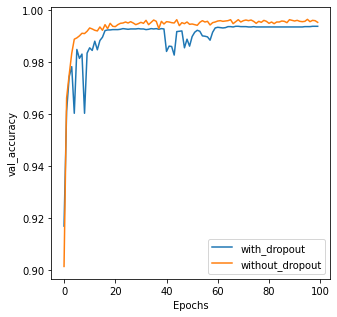

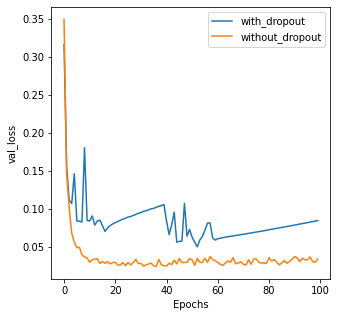

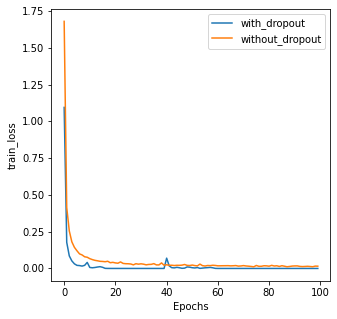

In [18]:
#val drop

import matplotlib.pyplot as plt

val_acc_with_dropout = history['val_accuracy']
train_acc_with_dropout=history['accuracy']

train_losses_with_dropout=history['loss']
val_losses_with_dropout=history['val_loss']




train_losses_without_dropout =history1['loss']
val_losses_without_dropout=history1['val_loss']

val_acc_without_dropout = history1['val_accuracy']
train_acc_without_dropout=history1['accuracy']

plt.figure(figsize=(5,5))
plt.xlabel('Epochs')
plt.ylabel('val_accuracy')
plt.plot(val_acc_with_dropout)
plt.plot(val_acc_without_dropout)
plt.legend(['with_dropout','without_dropout'])
plt.show()

plt.figure(figsize=(5,5))
plt.xlabel('Epochs')
plt.ylabel('train_accuracy')
plt.plot(train_acc_with_dropout)
plt.plot(train_acc_without_dropout)
plt.legend(['with_dropout','without_dropout'])
plt.show()



plt.figure(figsize=(5,5))
plt.xlabel('Epochs')
plt.ylabel('val_loss')
plt.plot(val_losses_with_dropout)
plt.plot(val_losses_without_dropout)
plt.legend(['with_dropout','without_dropout'])
plt.show()


plt.figure(figsize=(5,5))
plt.xlabel('Epochs')
plt.ylabel('train_loss')
plt.plot(train_losses_with_dropout)
plt.plot(train_losses_without_dropout)
plt.legend(['with_dropout','without_dropout'])
plt.show()


In [ ]:
from keras.utils import plot_model

plot_model(model ,to_file = 'model.png' , show_shapes=True, show_layer_names=True )


import matplotlib.pyplot as plt


losses=history['loss']
val_losses=history['val_loss']

acc=history['accuracy']
val_acc = history['val_accuracy']



plt.figure(figsize=(10,10))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(losses)
plt.plot(val_losses)
plt.legend(['train loss','val_loss'])

plt.figure(figsize=(10,10))
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.plot(acc)
plt.plot(val_acc)
plt.legend(['train accuracy','val_accuracy'])

In [13]:
#read test data
import pandas as pd
data = pd.read_csv('/kaggle/input/gtsrb-german-traffic-sign/Test.csv')

X_test =[]
Y_test=[]
path='/kaggle/input/gtsrb-german-traffic-sign/test'

grup = os.listdir(path)
for imasg in grup:
    n+=1
    if(imasg!='GT-final_test.csv'):
        img=np.array(Image.open(os.path.join(path,imasg )).resize((30,30),Image.ANTIALIAS))
        X_test.append(img)
        p=(os.path.join('Test',imasg ))
        Y_test.append(data.loc[data['Path'] == p, 'ClassId'].iloc[0])

        
        
X_t=np.array(X_test)
X_t = X_t.astype('float32')
X_test=X_t/255.0

print(X_test.shape)


Y_t=np.array(Y_test)
from keras.utils import np_utils
Y_test=np_utils.to_categorical(Y_t)
print(Y_test.shape)

test_loss,test_acc=model1.evaluate(X_test,Y_test)


predicted_labels=model1.predict(X_test)
print(predicted_labels.shape)
print("test_loss",test_loss)
print("test_acc" , test_acc)

(12630, 30, 30, 3)
(12630, 43)
12630/12630 [==============================] - 3s 219us/step
(12630, 43)
test_loss 0.1689292856694987
test_acc 0.974030077457428


In [ ]:
from sklearn.metrics import plot_confusion_matrix

#dict = {0:"Speed limit (20km/h)",1:"Speed limit (30km/h)",2:"Speed limit (50km/h)",3:"Speed limit (60km/h)",4:"Speed limit (70km/h)"
#        ,5:"Speed limit (80km/h)",6:"End of speed limit (80km/h)",7:"Speed limit (100km/h)",8:"Speed limit (120km/h)",9:"No passing" ,
 #        10:"No passing for vehicles over 3.5 metric tons" ,11:"Right-of-way at the next intersection" , 12:"Priority road" ,
 #      13:"Yield" , 14:"Stop" , 15:"No vehicles" , 16:"Vehicles over 3.5 metric tons prohibited" , 17:"No entry" ,
  #     18:"General caution" , 19:"Dangerous curve to the left" , 20:""}
    
    
target_names = []

for i in range (0,42):
    targetnames.append(i)

print(target_names)

plt.figure()
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                  horizontalalignment="center",
                  color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    
cnf_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cnf_matrix, classes=target_names , normalize=True, title='matrix')